Iteration 0: Cost = 0.6930724371172697
Iteration 100: Cost = 0.6861483455693242
Iteration 200: Cost = 0.680199725629048
Iteration 300: Cost = 0.6750779039075117
Iteration 400: Cost = 0.6706588640828551
Iteration 500: Cost = 0.666838857637395
Iteration 600: Cost = 0.6635308235976658
Iteration 700: Cost = 0.6606614725925287
Iteration 800: Cost = 0.6581689121744823
Iteration 900: Cost = 0.6560007109928542


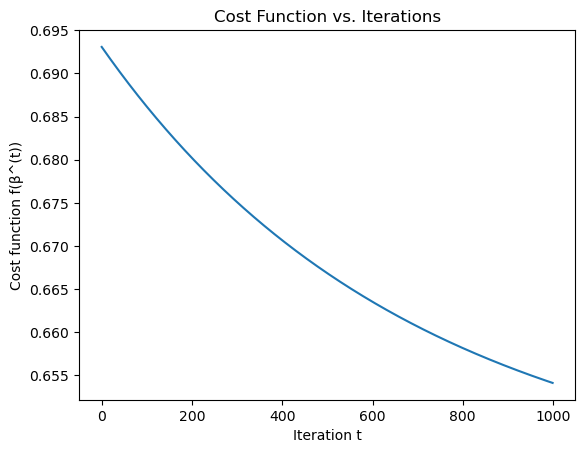

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
X = pd.read_csv('X_data.csv').values
y = pd.read_csv('y_data.csv').values.flatten()

# Parameters
lambda_ = 5
eta = 1e-4
n, d = X.shape

# Cost function as given in the assignment
def cost_function(beta):
    z = np.dot(X, beta)
    cost = np.mean(-y * z + np.log(1 + np.exp(z))) + 0.5 * lambda_ * np.sum(beta ** 2)
    return cost

# Gradient of the cost function
def gradient(beta):
    z = np.dot(X, beta)
    gradient = np.dot(X.T, (1 / (1 + np.exp(-z)) - y)) / n + lambda_ * beta
    return gradient

# X : The feature matrix.
# y : The target vector.
# eta = 1e-4 : The constant step size.
# max_iter = 1000 : The maximum number of iterations.
# lambda_ = 5 : The regularization parameter.
def gradient_descent(X, y, eta, lambda_, max_iter=1000):
    beta = np.zeros(d) # Initial point
    cost_history = [] 

    for t in range(max_iter):
        beta -= eta * gradient(beta) # Update point
        cost = cost_function(beta) # Compute cost
        cost_history.append(cost)

        if t % 100 == 0:
            print(f"Iteration {t}: Cost = {cost}")

    return beta, cost_history

# Running and plotting of Gradient Descent
beta_opt, cost_history = gradient_descent(X, y, eta, lambda_)
plt.plot(cost_history)
plt.xlabel('Iteration t')
plt.ylabel('Cost function f(β^(t))')
plt.title('Cost Function vs. Iterations')
plt.show()

